In [1]:
import time
start = time.perf_counter()

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap

In [2]:
np.random.seed(903967645)

In [3]:
phishing_dataset = pd.read_csv('../data/phishing_dataset.csv')
print(phishing_dataset.info())
phishing_dataset.drop(columns=['index'], inplace=True)
phishing_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# Check shape of dataset and for null data
print(phishing_dataset.shape)
phishing_dataset.isna().any().any()

(11055, 31)


False

In [5]:
print(phishing_dataset.columns)

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [6]:
# Separate features and target
phishing_dataset = phishing_dataset.sample(frac=0.1, random_state=42)
print(phishing_dataset.shape)

train_X = phishing_dataset.drop(columns=['Result'])
train_y = phishing_dataset['Result']

# Normalize the feature data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(train_X)

# Convert back to DataFrame
train_X = pd.DataFrame(X_scaled, columns=train_X.columns)

(1106, 31)


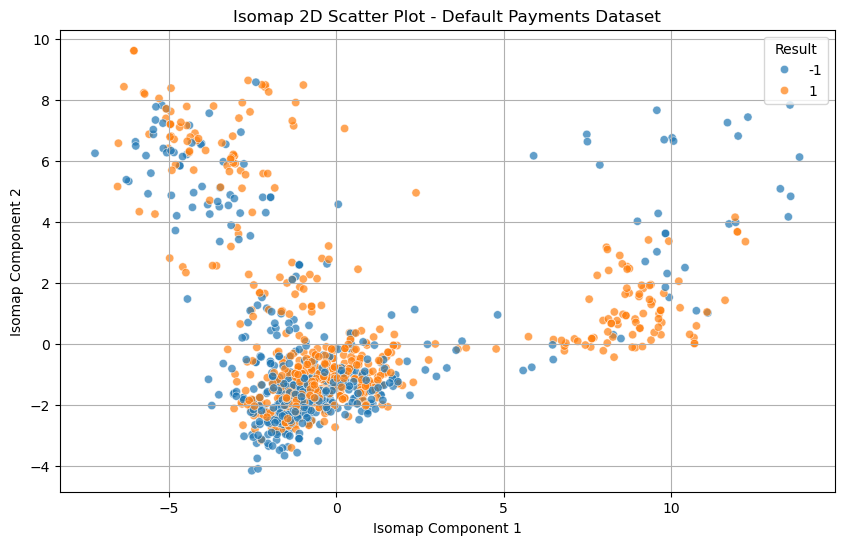

CPU times: user 26 s, sys: 13.5 s, total: 39.5 s
Wall time: 5.65 s


In [7]:
%%time
# Initialize Isomap with desired number of components
n_components = 2
isomap = Isomap(n_components=n_components, n_neighbors=5)

# Fit and transform the data
isomap_result = isomap.fit_transform(train_X)

# Create a DataFrame for the result
isomap_df = pd.DataFrame(isomap_result, columns=[f'Isomap-{i}' for i in range(n_components)])
isomap_df['Result'] = train_y.values

# Plotting the first two Isomap components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Isomap-0', y='Isomap-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=isomap_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap 2D Scatter Plot (Phishing)')
plt.savefig('../images/isomap-phishing-2d.png')
plt.grid(True)
plt.show()

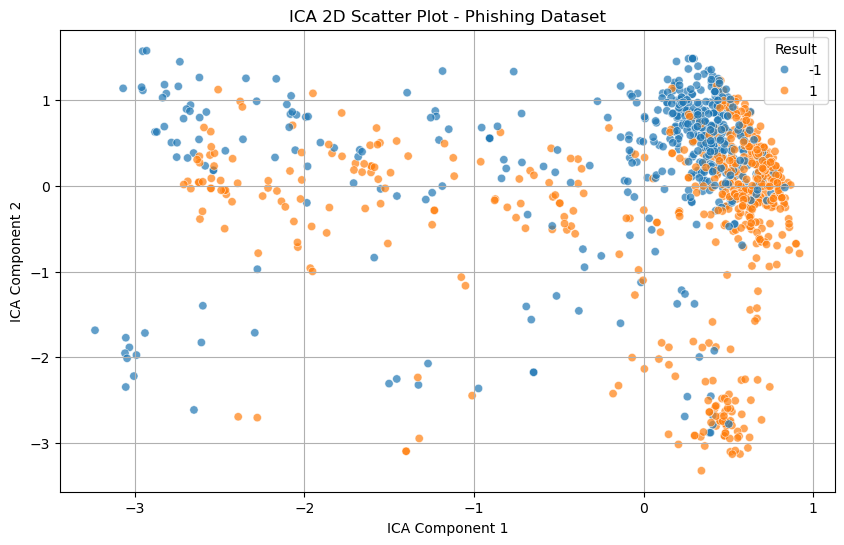

In [11]:
# Initialize ICA
ica = FastICA(n_components=n_components, random_state=42)

# Fit and transform the data
ica_result = ica.fit_transform(train_X)

# Create a DataFrame for the result
ica_df = pd.DataFrame(ica_result, columns=[f'ICA-{i}' for i in range(n_components)])
ica_df['Result'] = train_y.values

# Plotting ICA result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ICA-0', y='ICA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=ica_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('ICA 2D Scatter Plot (Phishing Dataset)')
plt.savefig('../images/isomap-ica-phishing-2d.png')
plt.grid(True)
plt.show()

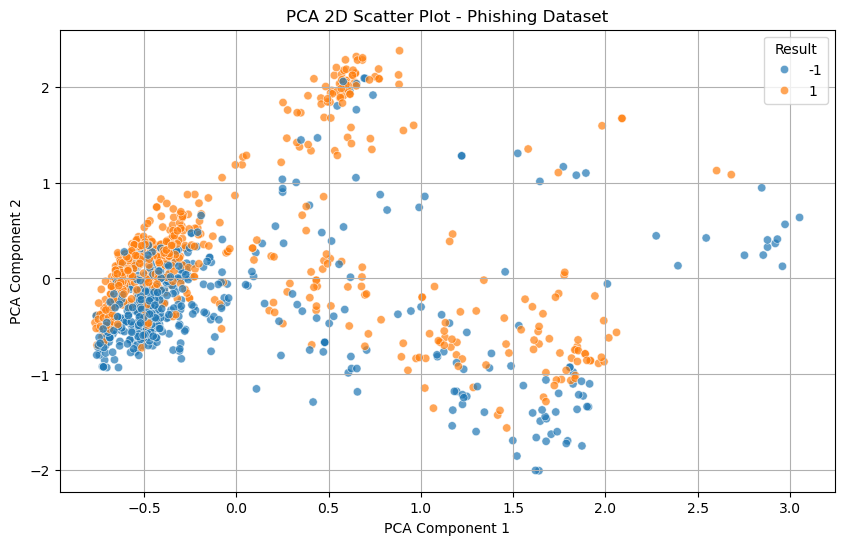

In [12]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_X)

pca_df = pd.DataFrame(pca_result, columns=[f'PCA-{i}' for i in range(2)])
pca_df['Result'] = train_y.values

# Plotting PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA-0', y='PCA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=pca_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Scatter Plot (Phishing Dataset)')
plt.savefig('../images/isomap-pca-phishing-2d.png')
plt.grid(True)
plt.show()

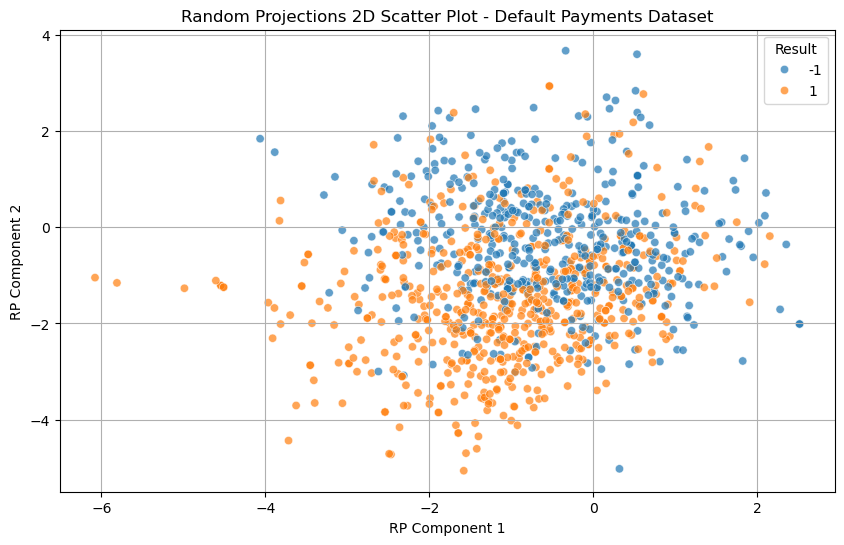

In [13]:
# Initialize Random Projections
rp = GaussianRandomProjection(n_components=n_components, random_state=42)

# Fit and transform the data
rp_result = rp.fit_transform(train_X)

# Create a DataFrame for the result
rp_df = pd.DataFrame(rp_result, columns=[f'RP-{i}' for i in range(n_components)])
rp_df['Result'] = train_y.values

# Plotting Random Projections result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='RP-0', y='RP-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=rp_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('Random Projections 2D Scatter Plot (Phishing)')
plt.savefig('../images/isomap-rp-phishing-2d.png')
plt.grid(True)
plt.show()

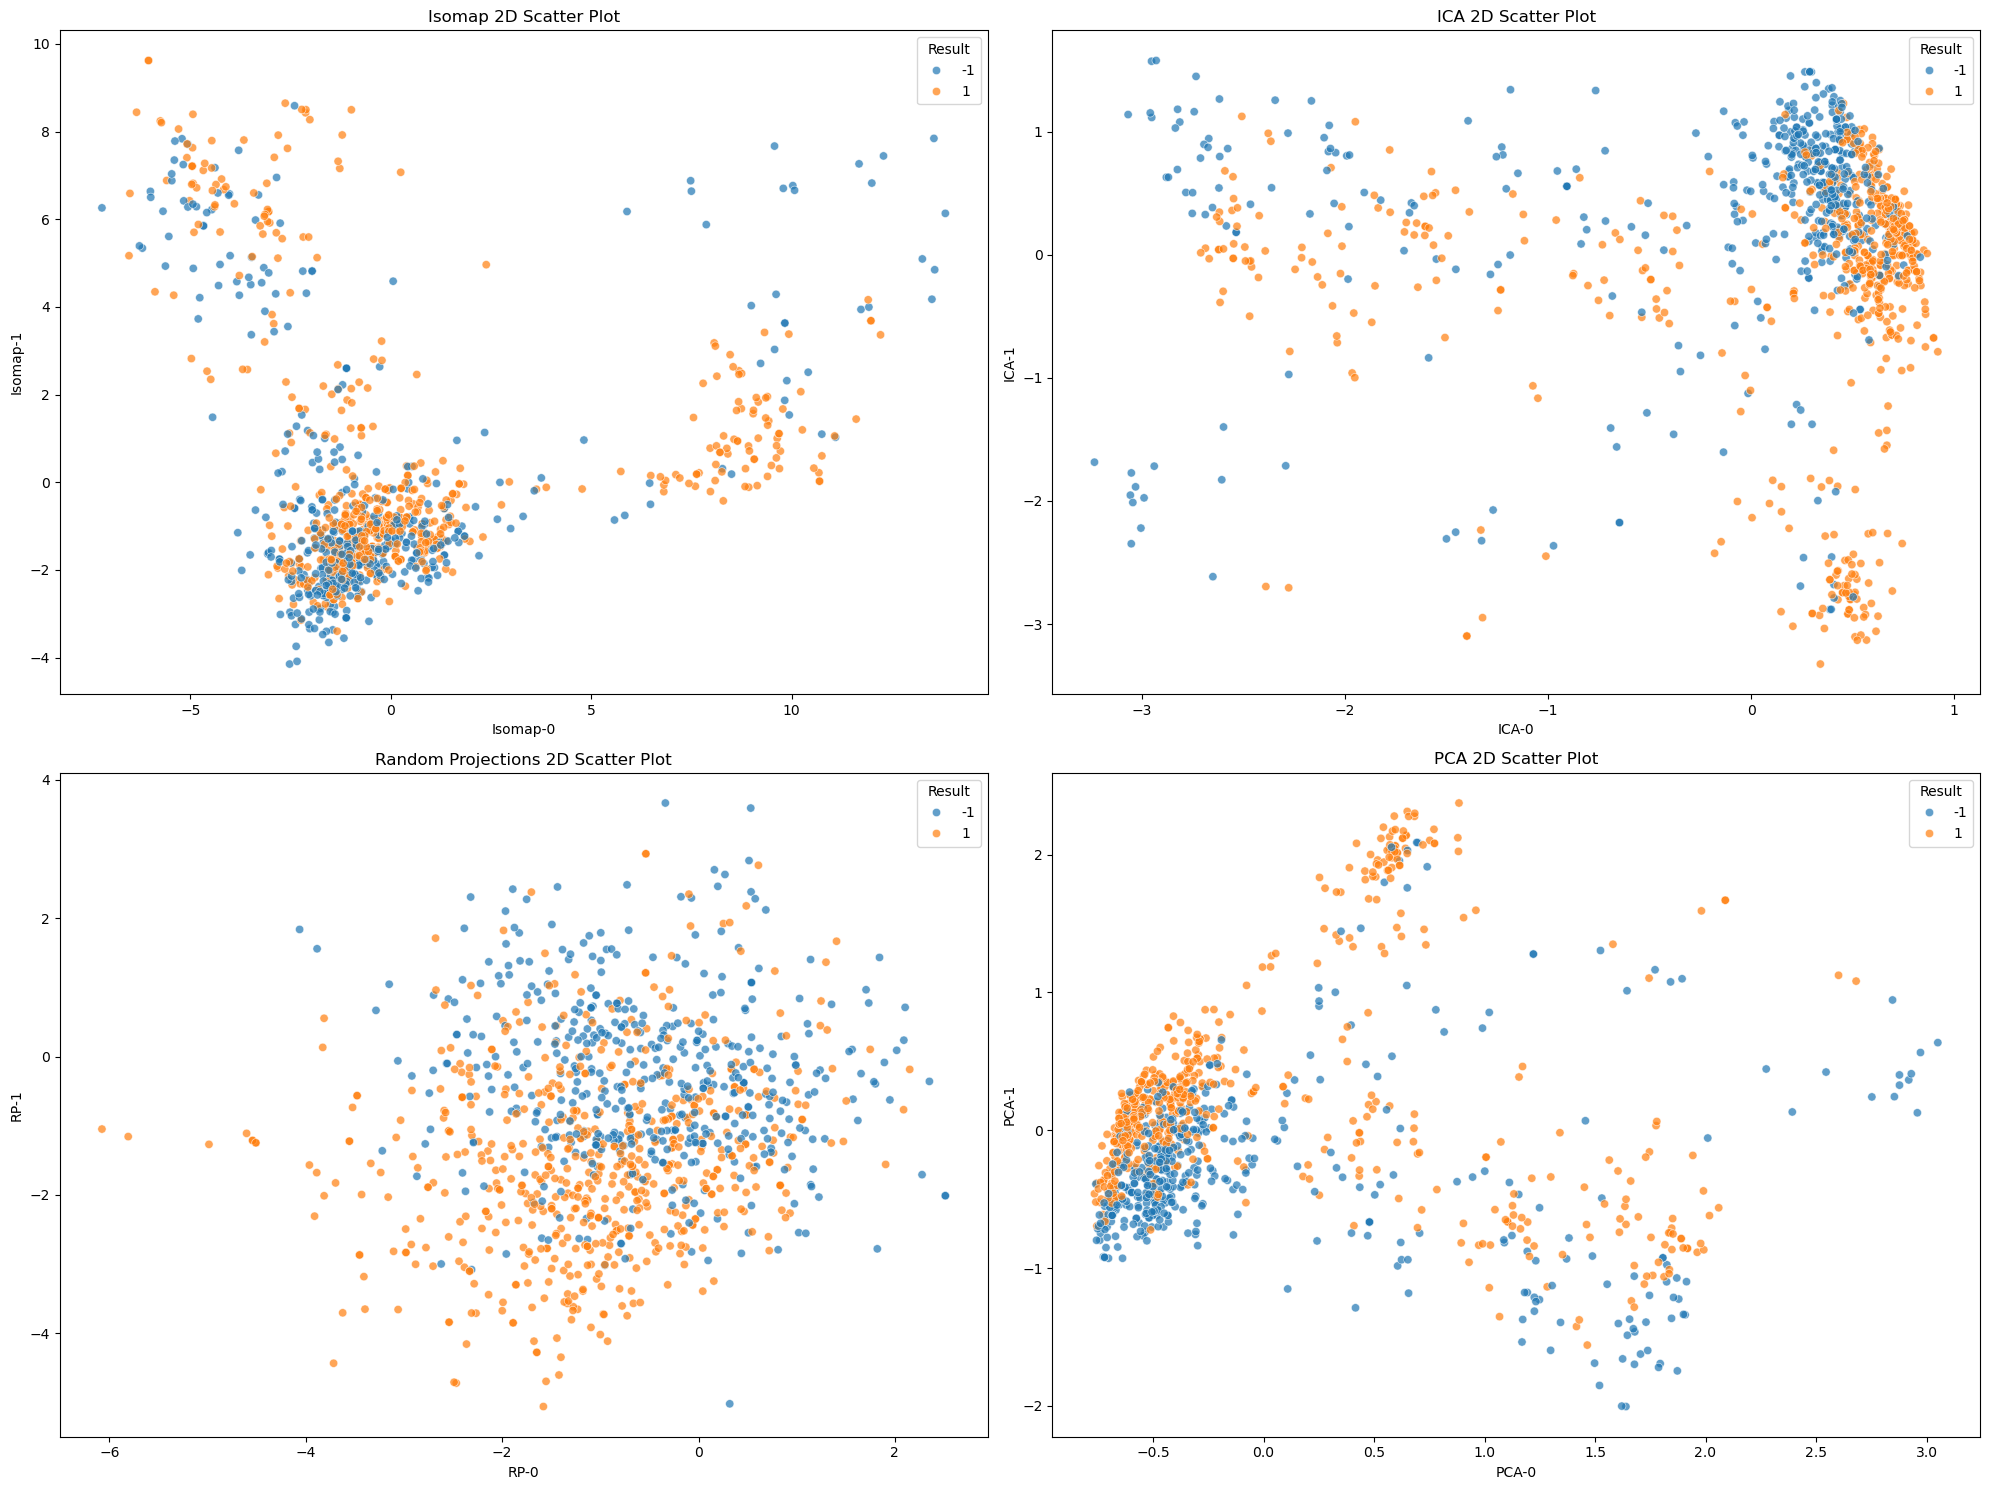

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Isomap Plot
sns.scatterplot(
    x='Isomap-0', y='Isomap-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=isomap_df,
    legend='full',
    alpha=0.7,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Isomap 2D Scatter Plot (Phishing)')

# ICA Plot
sns.scatterplot(
    x='ICA-0', y='ICA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=ica_df,
    legend='full',
    alpha=0.7,
    ax=axes[0, 1]
)
axes[0, 1].set_title('ICA 2D Scatter Plot (Phishing)')

# Random Projections Plot
sns.scatterplot(
    x='RP-0', y='RP-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=rp_df,
    legend='full',
    alpha=0.7,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Random Projections 2D Scatter Plot (Phishing)')

# PCA Plot (for reference)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_X)
pca_df = pd.DataFrame(pca_result, columns=[f'PCA-{i}' for i in range(2)])
pca_df['Result'] = train_y.values

sns.scatterplot(
    x='PCA-0', y='PCA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=pca_df,
    legend='full',
    alpha=0.7,
    ax=axes[1, 1]
)
axes[1, 1].set_title('PCA 2D Scatter Plot (Phishing)')

plt.tight_layout()
plt.show()

In [ ]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)